In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [ ]:
# !pip install -U statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ------ --------------------------------- 1.6/9.6 MB 14.5 MB/s eta 0:00:01
   --------------------------- ------------ 6.6/9.6 MB 21.5 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 22.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
filepath = 'train.csv'
df = pd.read_csv(filepath)
df.head()

,time,A,B,C,D,E,F,G,H,I,J,K,L,M,N,Y1,Y2
0,0,0.207366,-0.159951,-0.634176,-0.580962,-0.266505,0.060173,-0.475257,-1.486516,-0.332594,-0.671466,-0.226149,-0.187624,-0.780237,-0.785965,-0.935902,-0.310081
1,1,0.188828,-0.265508,0.042143,-0.550442,-0.132319,-0.185219,0.028295,0.093210,-0.518139,-0.251917,-0.347845,-0.359069,-0.161254,0.020401,-0.089707,-0.305374
2,2,-0.144261,-0.577142,-0.214634,-0.747391,-0.184255,-0.464831,-0.085181,0.700449,-0.603438,0.197773,-0.566696,-0.580799,0.202726,0.135261,-0.077855,-0.631485
3,3,0.208982,-0.310449,0.513708,-0.562868,0.742308,-0.305487,0.762246,1.363020,-0.384575,0.525556,-0.348514,-0.428099,0.548993,0.471031,0.941271,-0.535212
4,4,0.093320,-0.358156,0.173188,-0.687296,-0.161461,-0.116062,-0.245748,0.863372,-0.655588,-0.263358,-0.557428,-0.481214,0.083602,0.003087,-0.039582,-0.490561


In [5]:
# Drop the 'time' column as it is not needed for the analysis
df = df.drop(columns=['time'])

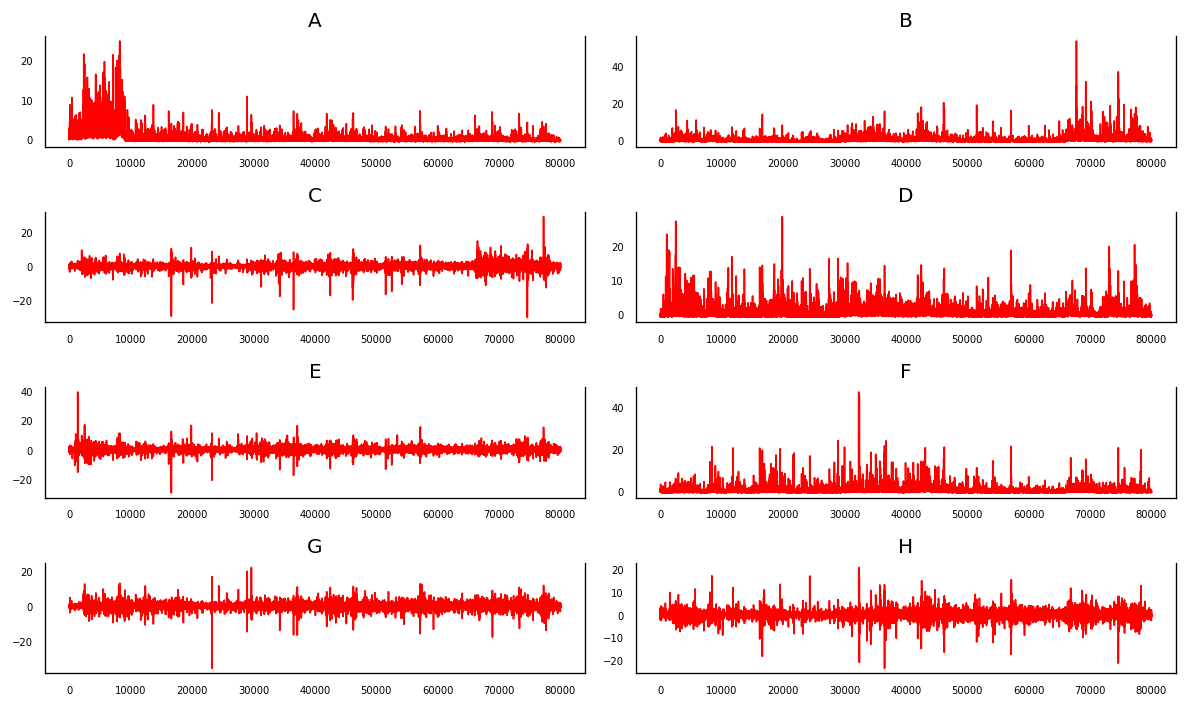

In [6]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [7]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)  

c:\Enzo_Files\25Wk37 Quant Trading\venv_Quant\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Enzo_Files\25Wk37 Quant Trading\venv_Quant\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
c:\Enzo_Files\25Wk37 Quant Trading\venv_Quant\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Enzo_Files\25Wk37 Quant Trading\venv_Quant\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Enzo_Files\25Wk37 Quant Trading\venv_Quant\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since funct

,A_x,B_x,C_x,D_x,E_x,F_x,G_x,H_x,I_x,J_x,K_x,L_x,M_x,N_x,Y1_x,Y2_x
A_y,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0006,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
B_y,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
C_y,0.0001,0.0000,1.0000,0.0000,0.0129,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
D_y,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
E_y,0.0000,0.0000,0.0306,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0006,0.0,0.0000,0.0002,0.0000,0.0000,0.0000
F_y,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
G_y,0.0000,0.0174,0.0000,0.0049,0.0178,0.0556,1.0000,0.0010,0.0003,0.0111,0.0,0.0035,0.0591,0.0095,0.0009,0.0009
H_y,0.0001,0.0000,0.0014,0.0002,0.4037,0.0000,0.0055,1.0000,0.0000,0.1938,0.0,0.0041,0.0180,0.0050,0.0000,0.0008
I_y,0.0125,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
J_y,0.0002,0.0000,0.0000,0.0000,0.0004,0.0007,0.0000,0.0000,0.0000,1.0000,0.0,0.0000,0.0001,0.0000,0.0000,0.0000


Anythin above 0.05 is not significant. Eliminate J and M for Y1

In [8]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

C:\Users\Enzo\AppData\Local\Temp\ipykernel_24632\1626024806.py:5: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  out = coint_johansen(df,-1,5)


Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
A      ::  132830.13 > nan       =>   False
B      ::  118670.8  > nan       =>   False
C      ::  104781.42 > nan       =>   False
D      ::  90929.68  > nan       =>   False
E      ::  77430.29  > 311.1288  =>   True
F      ::  64409.71  > 263.2603  =>   True
G      ::  51566.74  > 219.4051  =>   True
H      ::  38828.85  > 179.5199  =>   True
I      ::  26745.98  > 143.6691  =>   True
J      ::  22043.0   > 111.7797  =>   True
K      ::  17539.85  > 83.9383   =>   True
L      ::  13727.12  > 60.0627   =>   True
M      ::  9939.49   > 40.1749   =>   True
N      ::  6348.69   > 24.2761   =>   True
Y1     ::  3529.18   > 12.3212   =>   True
Y2     ::  1050.92   > 4.1296    =>   True


determines if a features has an effect with other features. Eliminates A to D for both Y1 and Y2

In [9]:
nobs = 20000
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (60000, 16)
print(df_test.shape)  # (20000, 16)

(60000, 16)
(20000, 16)


In [10]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print(' \n')

eliminates noise in time series

In [ ]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    



# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print(' \n')

AttributeError: 'DataFrame' object has no attribute 'iteritems'

In [13]:
# 1st difference
df_differenced = df_train.diff().dropna()

In [15]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

AttributeError: 'DataFrame' object has no attribute 'iteritems'

In [27]:
#sSampling the VAR Model

model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

/opt/conda/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


Lag Order = 1
AIC :  -13.13137064414456
BIC :  -13.090559915620448
FPE :  1.982066354813045e-06
HQIC:  -13.118694267982292 

Lag Order = 2
AIC :  -14.589839405765881
BIC :  -14.5106174060743
FPE :  4.6101308795679656e-07
HQIC:  -14.565231939152923 

Lag Order = 3
AIC :  -15.363489267130896
BIC :  -15.245854858052038
FPE :  2.126774238207145e-07
HQIC:  -15.326950338194987 

Lag Order = 4
AIC :  -15.860821232959175
BIC :  -15.704773276219873
FPE :  1.293400027851969e-07
HQIC:  -15.812350469810166 

Lag Order = 5
AIC :  -16.19904294545896
BIC :  -16.004580302732684
FPE :  9.222423216151286e-08
HQIC:  -16.138639976188806 

Lag Order = 6
AIC :  -16.447295629351462
BIC :  -16.21441716225831
FPE :  7.194991505211662e-08
HQIC:  -16.37496008203423 

Lag Order = 7
AIC :  -16.640338587003708
BIC :  -16.36904315711042
FPE :  5.9318861301587684e-08
HQIC:  -16.55607008969557 

Lag Order = 8
AIC :  -16.783739758051254
BIC :  -16.47402622687119
FPE :  5.139424416435414e-08
HQIC:  -16.68753793879049 



In [ ]:
x = model.select_order(maxlags=20)
x.summary()

In [ ]:
model_fitted = model.fit(4)
model_fitted.summary()

In [21]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print((col), ':', round(val, 2))

A : 2.02
B : 2.03
C : 2.06
D : 2.03
E : 2.06
F : 2.03
G : 2.06
H : 2.06
I : 2.02
J : 2.07
K : 2.02
L : 2.02
M : 2.07
N : 2.06
Y1 : 2.06
Y2 : 2.02


In [22]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

4


array([[-7.83744440e-02, -1.61524125e-01,  1.31136171e+00,
        -4.82640196e-01,  2.01123076e+00, -9.34830240e-02,
         1.10286286e+00,  2.37610416e-01, -3.52321200e-02,
         1.23198317e+00,  3.19396580e-02, -1.21471659e-01,
         1.13438941e+00,  9.87989464e-01,  1.95737652e+00,
        -2.25216190e-01],
       [ 5.31314140e-02,  1.31810919e-01,  5.08723010e-02,
        -1.03513992e-01,  6.59405010e-02,  1.11521747e-01,
         8.27258727e-01,  1.03781071e+00,  6.84469680e-02,
         5.12205387e-01,  1.30653040e-02,  3.40393042e-01,
         3.98404299e-01, -4.10895852e-01,  5.44913621e-01,
         4.65797456e-01],
       [-7.77819200e-03, -1.50648167e-01, -3.92579013e-01,
         2.99039400e-01, -6.44936336e-01, -2.94744100e-03,
        -1.74770805e+00, -1.48632794e+00,  2.44195020e-02,
        -8.84573861e-01,  5.70723380e-02, -6.09415660e-02,
        -1.12610097e+00, -4.03824172e-01, -1.63054931e+00,
        -2.47123273e-01],
       [ 4.10519150e-02,  6.88846270e

In [23]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,A_2d,B_2d,C_2d,D_2d,E_2d,F_2d,G_2d,H_2d,I_2d,J_2d,K_2d,L_2d,M_2d,N_2d,Y1_2d,Y2_2d
60000,-0.030817,-0.016268,-0.201319,0.115298,0.347277,0.031389,0.016724,0.099415,-0.020883,2.408286e-01,6.550778e-02,6.482386e-02,-0.120385,-0.044111,0.135779,9.239140e-02
60001,0.013625,0.007846,0.187084,0.004024,0.219919,0.059926,0.143256,0.007897,0.014524,1.357191e-01,2.975448e-02,1.311622e-02,0.131235,0.082449,0.230996,4.007259e-02
60002,-0.000704,-0.002310,-0.000587,-0.021508,-0.113762,-0.004405,-0.029769,0.060159,0.004999,-2.402463e-02,4.460013e-03,1.310786e-02,0.008813,-0.092605,-0.071785,3.227180e-02
60003,-0.003459,-0.005160,-0.072556,0.015534,-0.105073,-0.015901,-0.195160,-0.185901,-0.022503,-1.325409e-01,-2.029047e-02,-3.323257e-03,-0.138436,-0.026627,-0.191649,-2.811973e-02
60004,-0.001524,0.009444,0.013236,0.000263,-0.001230,-0.007648,0.108974,0.089376,0.007338,1.840341e-02,-1.263582e-02,-1.461006e-02,0.074659,0.062259,0.071634,-1.432190e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,-0.000008,-0.000002,-0.000003,0.000002,-0.000002,-0.000005,-0.000004,-0.000011,0.000002,-3.087820e-07,5.665829e-07,-7.452012e-07,-0.000001,-0.000002,-0.000002,-2.990646e-07
79996,-0.000008,-0.000002,-0.000003,0.000002,-0.000002,-0.000005,-0.000004,-0.000011,0.000002,-3.087820e-07,5.665829e-07,-7.452012e-07,-0.000001,-0.000002,-0.000002,-2.990646e-07
79997,-0.000008,-0.000002,-0.000003,0.000002,-0.000002,-0.000005,-0.000004,-0.000011,0.000002,-3.087820e-07,5.665829e-07,-7.452012e-07,-0.000001,-0.000002,-0.000002,-2.990646e-07
79998,-0.000008,-0.000002,-0.000003,0.000002,-0.000002,-0.000005,-0.000004,-0.000011,0.000002,-3.087820e-07,5.665829e-07,-7.452012e-07,-0.000001,-0.000002,-0.000002,-2.990646e-07


NameError: name 'df_results' is not defined

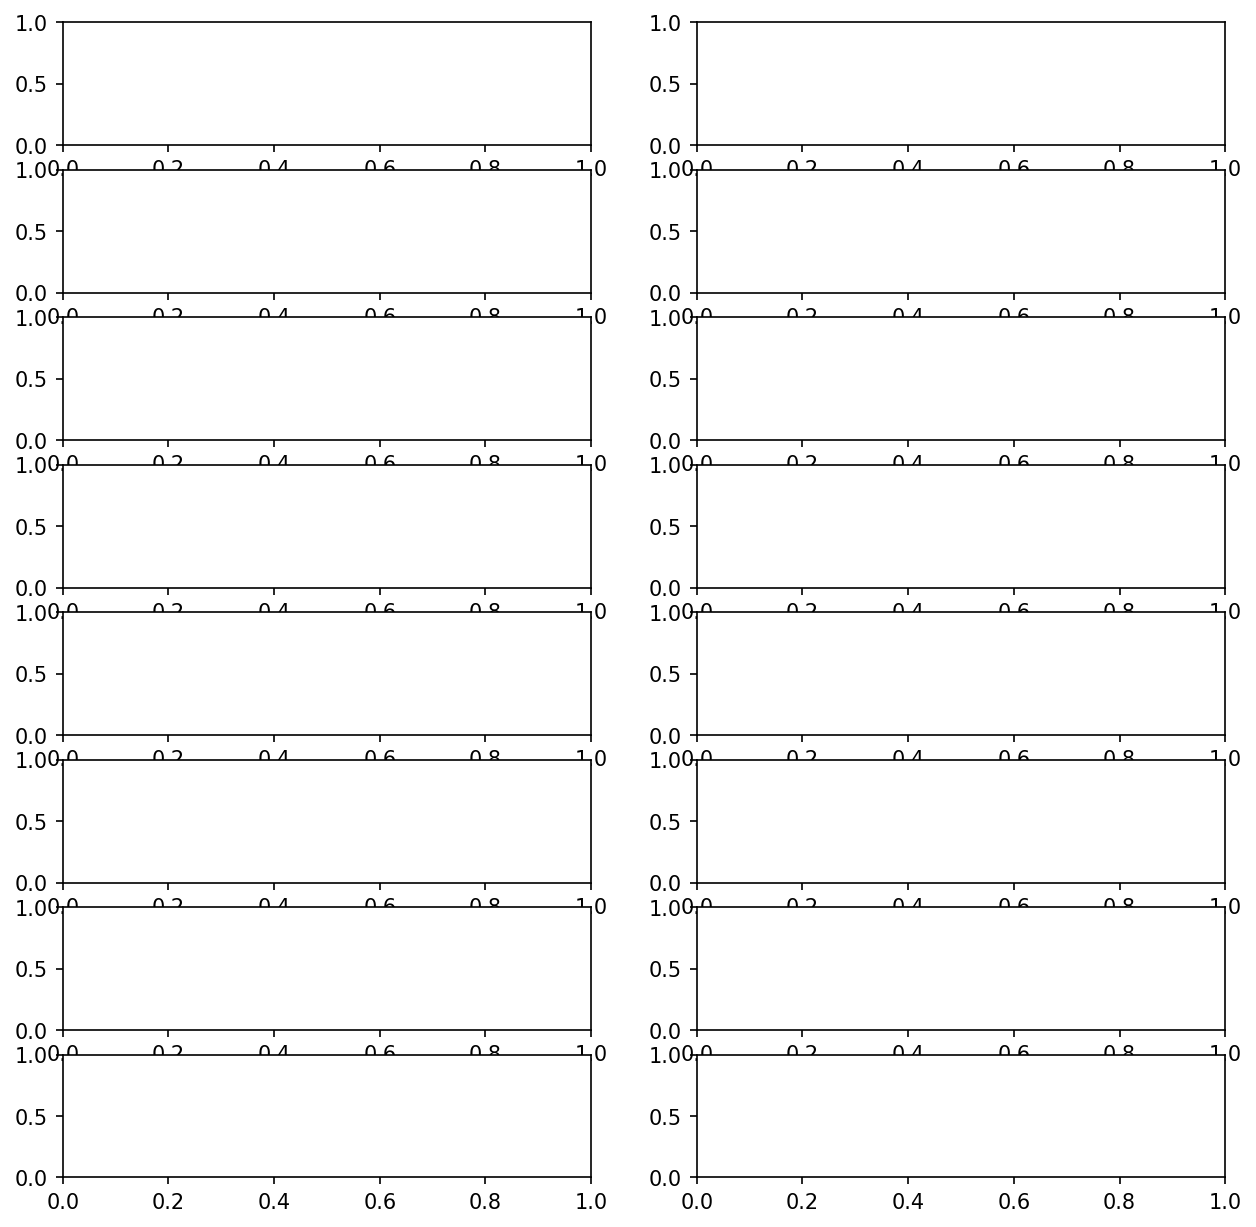

In [24]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();